In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('15-knn-k-nearest-neighbors-supervised-ml-algo-58a6a')
jovian.set_colab_id('15IRZM-xOH-k4k7OFSzcoM-fDB7yKa_O1')

K-Nearest Neighbors Algorithm using Scikit-Learn
------------------------------------------------------------------------

The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. KNN is extremely easy to implement in its most basic form, and yet performs quite complex classification tasks. 

> It is a lazy learning algorithm since it doesn't have a specialized training phase. Rather, it uses all of the data for training while classifying a new data point or instance. 

KNN is a non-parametric learning algorithm, which means that it doesn't assume anything about the underlying data. This is an extremely useful feature since most of the real world data doesn't really follow any theoretical assumption e.g. linear-separability, uniform distribution, etc.

Theory
----------
The intuition behind the KNN algorithm is one of the simplest of all the supervised machine learning algorithms. It simply calculates the distance of a new data point to all other training data points. The distance can be of any type e.g Euclidean or Manhattan etc. It then selects the K-nearest data points, where K can be any integer. Finally it assigns the data point to the class to which the majority of the K data points belong.

Let's see this algorithm in action with the help of a simple example. Suppose you have a dataset with two variables, which when plotted, looks like the one in the following figure.

> Manhattan distance between 2 points is the distance along the axis, like you measure the distance in a right angled way. Usually used in circuits to measure the distance wires take; as the wires cannot run in between the circuit-boards.

![sample_data_points_for_KNN](sample_data_points_for_KNN.png 'sample_data_points_for_KNN')

Your task is to classify a new data point with 'X' into "Blue" class or "Red" class. The coordinate values of the data point are x=45 and y=50. Suppose the value of K is 3. The KNN algorithm starts by calculating the distance of point X from all the points. It then finds the 3 nearest points with least distance to point X. This is shown in the figure below. The three nearest points have been encircled.

![sample_data_points_for_KNN](sample_2_data_points_for_KNN.png 'sample_2_data_points_for_KNN')

The final step of the KNN algorithm is to assign new point to the class to which majority of the three nearest points belong. From the figure above we can see that the two of the three nearest points belong to the class "Red" while one belongs to the class "Blue". Therefore the new data point will be classified as "Red".

Implementing KNN Algorithm with Scikit-Learn
-------------------------------------------------------------------

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with ... load the iris data set
irisdata = sns.load_dataset('iris')
irisdata.head()#look at the attributes (=> X) and Labels(=>y)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
irisdata.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Preprocessing data  -> drop species to get X, only extract species to get Y
X = irisdata.drop('species', axis=1)
y = irisdata['species']


# Train Test Split  -> use train_test_split()
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)




# Feature Scaling
# Before making any actual predictions, it is always 
# a good practice to scale the features so that all of them 
# can be uniformly evaluated.

from sklearn.preprocessing import MinMaxScaler  
# make MinMaxScaler object
mms = MinMaxScaler()

# fit scalar-object over the X_train dataset

X_train = mms.fit_transform(X_train)


# use scalar-object to transform the X_train and X_test data set
X_test = mms.transform(X_test)



# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



The results show that our KNN algorithm was able to classify all the 37 out of 38 records in the test set with 97% accuracy, which is excellent. Although the algorithm performed very well with this dataset, don't expect the same results with all applications. As noted earlier, KNN doesn't always perform as well with high-dimensionality or categorical features.

Comparing Error Rate with the K Value
-------------------------------------------------------
In the training and prediction section we said that there is no way to know beforehand which value of K that yields the best results in the first go. We randomly chose 5 as the K value and it just happen to result in 100% accuracy.

One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

In this section, we will plot the mean error for the predicted values of test set for all the K values between 1 and 40.

To do so, let's first calculate the mean of error for all the predicted values where K ranges from 1 and 40. Execute the following script:

Text(0, 0.5, 'Mean Error')

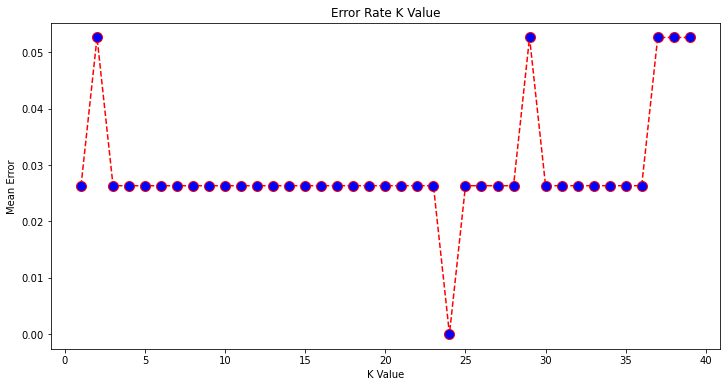

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    #here != compares 2 ndarray objects 
    # return value is array of true/false i.e 0/1 values , of which we are 
    # finding the mean values.
    
    
    # The above script executes a loop from 1 to 40. 
    # In each iteration the mean error for predicted values of test set 
    # is calculated and the result is appended to the error list.
    
# The next step is to plot the error values against K values.
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')     

__From the output we can see that the mean error is ~0.01 when the value of the K is between 03 and 18. This o/p would differ for every participant/student of my course, as the train-test sets formed differ.__

Pros
------
1> It is extremely easy to implement

2> It is lazy learning algorithm and therefore requires no training prior to making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g SVM, linear regression, etc.
Since the algorithm requires no training before making predictions, new data can be added seamlessly.

3> There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)


Cons
-------
1> The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension.

2> The KNN algorithm has a high prediction cost for large datasets. This is because in large datasets the cost of calculating distance between new point and each existing point becomes higher.

3> Finally, the KNN algorithm doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features.